# ÌÅ¨Î°§ÎßÅ Í≥µÎ∂ÄÌïòÍ∏∞ 
* from 13Í∏∞ Ï≤úÏû¨ Ï°∞ÏÉÅÏó∞Îãò Í∞ïÏùòÏûêÎ£å...bbb

In [1]:
import requests
import pandas as pd

from IPython import display

In [8]:
import json
from pandas.io.json import json_normalize

## HTML Íµ¨Ï°∞ Ïù¥Ìï¥ÌïòÍ∏∞ 
* https://flukeout.github.io/

In [22]:
display.HTML("""
<style>
    .blue {
        color:  blue;
    }
    
    .blue.blue2 {
        color: green;
    }
    
    #title {
        color: red;
    }
</style>
<div>
    <p class="blue blue2">1. ÏïàÎÖïÌïòÏÑ∏Ïöî</p>
    <p>2. ÏïàÎÖïÌïòÏÑ∏Ïöî</p>
    <p class="blue">3. ÏïàÎÖïÌïòÏÑ∏Ïöî</p>
    <p>4. ÏïàÎÖïÌïòÏÑ∏Ïöî</p>
    <p id="title">5. ÏïàÎÖïÌïòÏÑ∏Ïöî</p>
    
</div>
""")

## Requests
1. Method ÌôïÏù∏
2. ÌïÑÏöîÌïú Î∂ÄÌíà (URL, Params, Header, Data) Ï≤¥ÌÅ¨
3. Í≤∞Í≥º ÌôïÏù∏ Î∞è Ïò§Î•ò Ïãú 2Î≤à ÏÇ¨Ìï≠ Î∞òÎ≥µ Ï≤¥ÌÅ¨
4. Í≤∞Í≥º ÌòïÏãùÏóê Îî∞Îùº ÌååÏã±

### 1. get Î∞©Ïãù 

In [33]:
def news_search_results(keyword) : 

    url = "https://search.naver.com/search.naver?where=news&sm=tab_jum&query="

    payload = {}
    
    my_params = {'where': 'news', 
                 'sm': 'tab_jum', 
                 'query': keyword}
    
    headers = {
      'Cookie': 'nx_ssl=2; page_uid=Uz/ebsprvmsssRTrhUlssssssSC-486880; _naver_usersession_=uHqHJ0mKO+hzkL4FTZEq5Q=='
    }

    response = requests.request("GET", url+keyword, headers=headers, data = payload)

    return response

In [34]:
news_search_results("ÌÖåÎÑ∑")

<Response [200]>

In [35]:
news_search_results("ÌÖåÎÑ∑").text[:500]

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="ÌÖåÎÑ∑ : ÎÑ§Ïù¥Î≤Ñ Îâ¥Ïä§Í≤ÄÏÉâ"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'ÌÖåÎÑ∑\'Ïùò ÎÑ§Ïù¥Î≤Ñ Îâ¥Ïä§Í≤ÄÏÉâ Í≤∞Í≥ºÏûÖÎãàÎã§."> <meta name="description"'

## JSON 
* https://www.timeshighereducation.com/world-university-rankings/2020/world-ranking#
* PostmanÏùò User-AgentÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò¨ Ïàò ÏóÜÎäî Í≤ΩÏö∞ 

In [15]:
def univ_ranking() : 
    url = "https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2020_0__24cc3874b05eea134ee2716dbf93f11a.json"

    payload = {}
    headers = {
      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36',
      'Cookie': 'siteCountry=GB; geoCountry=KR'
    }

    response = requests.request("GET", url, headers=headers, data = payload)

    return response

In [16]:
univ_ranking()

<Response [200]>

In [17]:
# Ï≤´Î≤àÏß∏ Î∞©Î≤ï 
result = univ_ranking().json()
df_univ_ranking = json_normalize(result["data"])

In [18]:
df_univ_ranking.head()

rank_order rank                                   name scores_overall  \
0         10    1                   University of Oxford           95.4   
1         20    2     California Institute of Technology           94.5   
2         30    3                University of Cambridge           94.4   
3         40    4                    Stanford University           94.3   
4         50    5  Massachusetts Institute of Technology           93.6   

  scores_overall_rank scores_teaching scores_teaching_rank scores_research  \
0                  10            90.5                    6            99.6   
1                  20            92.1                    2            97.2   
2                  30            91.4                    4            98.7   
3                  40            92.8                    1            96.4   
4                  50            90.5                    5            92.4   

  scores_research_rank scores_citations  ...  \
0                    1             98.4  ...   
1                    4             97.9  ...   
2                    2             95.8  ...   
3                    5             99.9  ...   
4                   10             99.5  ...   

                                                 url     nid        location  \
0       /world-university-rankings/university-oxford     468  United Kingdom   
1  /world-university-rankings/california-institut...  128779   United States   
2    /world-university-rankings/university-cambridge     470  United Kingdom   
3     /world-university-rankings/stanford-university     467   United States   
4  /world-university-rankings/massachusetts-insti...     471   United States   

  stats_number_students stats_student_staff_ratio stats_pc_intl_students  \
0                20,664                      11.2                    41%   
1                 2,240                       6.4                    30%   
2                18,978                      10.9                    37%   
3                16,135                       7.3                    23%   
4                11,247                       8.6                    34%   

  stats_female_male_ratio                                     aliases  \
0                 46 : 54                        University of Oxford   
1                 34 : 66  California Institute of Technology caltech   
2                 47 : 53                     University of Cambridge   
3                 43 : 57                         Stanford University   
4                 39 : 61       Massachusetts Institute of Technology   

                                    subjects_offered  \
0  Mechanical & Aerospace Engineering,Computer Sc...   
1  Biological Sciences,Mechanical & Aerospace Eng...   
2  Languages, Literature & Linguistics,Computer S...   
3  Archaeology,Physics & Astronomy,Law,General En...   
4  Veterinary Science,Languages, Literature & Lin...   

                                          apply_link  
0  https://www.timeshighereducation.com/student/r...  
1                                                NaN  
2  https://www.timeshighereducation.com/student/r...  
3                                                NaN  
4                                                NaN  

[5 rows x 27 columns]

In [20]:
# ÎëêÎ≤àÏß∏ Î∞©Î≤ï 
result = json.loads(univ_ranking().text)
df_univ_ranking = json_normalize(result["data"])

In [21]:
df_univ_ranking.head()

rank_order rank                                   name scores_overall  \
0         10    1                   University of Oxford           95.4   
1         20    2     California Institute of Technology           94.5   
2         30    3                University of Cambridge           94.4   
3         40    4                    Stanford University           94.3   
4         50    5  Massachusetts Institute of Technology           93.6   

  scores_overall_rank scores_teaching scores_teaching_rank scores_research  \
0                  10            90.5                    6            99.6   
1                  20            92.1                    2            97.2   
2                  30            91.4                    4            98.7   
3                  40            92.8                    1            96.4   
4                  50            90.5                    5            92.4   

  scores_research_rank scores_citations  ...  \
0                    1             98.4  ...   
1                    4             97.9  ...   
2                    2             95.8  ...   
3                    5             99.9  ...   
4                   10             99.5  ...   

                                                 url     nid        location  \
0       /world-university-rankings/university-oxford     468  United Kingdom   
1  /world-university-rankings/california-institut...  128779   United States   
2    /world-university-rankings/university-cambridge     470  United Kingdom   
3     /world-university-rankings/stanford-university     467   United States   
4  /world-university-rankings/massachusetts-insti...     471   United States   

  stats_number_students stats_student_staff_ratio stats_pc_intl_students  \
0                20,664                      11.2                    41%   
1                 2,240                       6.4                    30%   
2                18,978                      10.9                    37%   
3                16,135                       7.3                    23%   
4                11,247                       8.6                    34%   

  stats_female_male_ratio                                     aliases  \
0                 46 : 54                        University of Oxford   
1                 34 : 66  California Institute of Technology caltech   
2                 47 : 53                     University of Cambridge   
3                 43 : 57                         Stanford University   
4                 39 : 61       Massachusetts Institute of Technology   

                                    subjects_offered  \
0  Mechanical & Aerospace Engineering,Computer Sc...   
1  Biological Sciences,Mechanical & Aerospace Eng...   
2  Languages, Literature & Linguistics,Computer S...   
3  Archaeology,Physics & Astronomy,Law,General En...   
4  Veterinary Science,Languages, Literature & Lin...   

                                          apply_link  
0  https://www.timeshighereducation.com/student/r...  
1                                                NaN  
2  https://www.timeshighereducation.com/student/r...  
3                                                NaN  
4                                                NaN  

[5 rows x 27 columns]

## BeautifulSoupÎ•º Ïù¥Ïö©Ìïú HTML ÌååÏã±
* ÎßéÏù¥ ÏÇ¨Ïö©ÌïòÍ∏∞... 
* select ÌôúÏö© Ïûò ÌïòÍ∏∞ ! 

In [23]:
from bs4 import BeautifulSoup

In [36]:
res = news_search_results("ÏΩîÎ°úÎÇò")
if res.status_code == 200: print("OK!")

OK!


In [37]:
soup = BeautifulSoup(res.text, "html.parser") # parsingÌïú Í∞ùÏ≤¥

In [39]:
soup.title.text

'ÏΩîÎ°úÎÇò : ÎÑ§Ïù¥Î≤Ñ Îâ¥Ïä§Í≤ÄÏÉâ'

In [41]:
# 'ÏΩîÎ°úÎÇò' Í≤ÄÏÉâÌñàÏùÑ Îïå Îâ¥Ïä§ ÌÉÄÏù¥ÌãÄ 
soup.select("#sp_nws1 > dl > dt > a")[0].text

'Í≤ΩÏ∞∞Ï≤≠Ïóê ÏΩîÎ°úÎÇò19 Ï≤´ ÌôïÏßÑÏûê Î∞úÏÉù‚Ä¶Ï≤≠ÏÇ¨ 13Ï∏µ ÌèêÏáÑ'

In [44]:
# Ïó¨Îü¨Í∞ú Í∞ÄÏ†∏Ïò§Í∏∞ 
soup.select("._sp_each_title")[:3]

[<a class="_sp_each_title" href="http://yna.kr/AKR20200821040300004?did=1195m" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=1&amp;i=880000D8_000000000000000011828634&amp;g=001.0011828634&amp;u='+urlencode(this.href));" target="_blank" title="Í≤ΩÏ∞∞Ï≤≠Ïóê ÏΩîÎ°úÎÇò19 Ï≤´ ÌôïÏßÑÏûê Î∞úÏÉù‚Ä¶Ï≤≠ÏÇ¨ 13Ï∏µ ÌèêÏáÑ">Í≤ΩÏ∞∞Ï≤≠Ïóê <strong class="hl">ÏΩîÎ°úÎÇò</strong>19 Ï≤´ ÌôïÏßÑÏûê Î∞úÏÉù‚Ä¶Ï≤≠ÏÇ¨ 13Ï∏µ ÌèêÏáÑ</a>,
 <a class="_sp_each_title" href="https://news.sbs.co.kr/news/endPage.do?news_id=N1005941323&amp;plink=ORI&amp;cooper=NAVER" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=3&amp;i=8800011C_000000000000000000836231&amp;g=055.0000836231&amp;u='+urlencode(this.href));" target="_blank" title='2Ï∞® Ïû¨ÎÇúÏßÄÏõêÍ∏à ÎÇòÏò§ÎÇò‚Ä¶ÏΩîÎ°úÎÇò Ïû¨ÌôïÏÇ∞Ïóê "Ï∂îÏßÑ Í≤ÄÌÜ†"'>2Ï∞® Ïû¨ÎÇúÏßÄÏõêÍ∏à ÎÇòÏò§ÎÇò‚Ä¶<strong class="hl">ÏΩîÎ°úÎÇò</strong> Ïû¨ÌôïÏÇ∞Ïóê "Ï∂îÏßÑ Í≤ÄÌÜ†"</a>,
 <a class="_sp_each_title" href="https://news.sbs.co.kr/news/endPage.do?news_id=N1005941790&amp;plink=ORI&amp;c

In [45]:
pd.DataFrame([
    [atag.text , atag["href"]]
    for atag in soup.select("._sp_each_title")
], columns=["title", "url"])

title  \
0                Í≤ΩÏ∞∞Ï≤≠Ïóê ÏΩîÎ°úÎÇò19 Ï≤´ ÌôïÏßÑÏûê Î∞úÏÉù‚Ä¶Ï≤≠ÏÇ¨ 13Ï∏µ ÌèêÏáÑ   
1                2Ï∞® Ïû¨ÎÇúÏßÄÏõêÍ∏à ÎÇòÏò§ÎÇò‚Ä¶ÏΩîÎ°úÎÇò Ïû¨ÌôïÏÇ∞Ïóê "Ï∂îÏßÑ Í≤ÄÌÜ†"   
2                   Èùë "Ïò§ÎäòÎ∂ÄÌÑ∞ ÏΩîÎ°úÎÇò19 ÎπÑÏÉÅ ÎåÄÏùë Ï≤¥Ï†ú Í∞ÄÎèô"   
3               Ïò¨Ìï¥ ÏòàÎπÑÍµ∞ÌõàÎ†® Ï†ÑÎ©¥ Ï∑®ÏÜå‚Ä¶"ÏΩîÎ°úÎÇò ÏÉÅÌô© ÏóÑÏ§ë"(Ï¢ÖÌï©)   
4              ÏãúÏ¥ù 1¬∑2ÏúÑÎèÑ ÏΩîÎ°úÎÇòÏóê Îö´Î†∏Îã§‚Ä¶ÎåÄÍ∏∞ÏóÖ Î∞©Ïó≠Îßù 'Ï¥àÎπÑÏÉÅ'   
5                 Ï†ÑÏ£ºÏßÄÎ≤ï Î∂ÄÏû•ÌåêÏÇ¨ ÏΩîÎ°úÎÇò19 ÌôïÏßÑ‚Ä¶ÌòÑÏßÅÌåêÏÇ¨ Ï≤´ ÏÇ¨Î°Ä   
6              "ÎÇò ÏΩîÎ°úÎÇò ÌôïÏßÑÏûêÏïº"...ÏßÄÌïòÏ≤†ÏÑú ÎßàÏä§ÌÅ¨ Ïïà Ïì∞Í≥† ÎÇúÎèô   
7  '10Ï¥àÏùò Ïπ®Î¨µ' Êñá "ÏΩîÎ°úÎÇò ÏµúÎåÄ ÏúÑÍ∏∞...Î∞©Ïó≠ Î∞©Ìï¥Ïãú Í≥µÍ∂åÎ†• ÌñâÏÇ¨"[Ï†ÑÎ¨∏]   
8     [Îã®ÎèÖ] ÏΩîÎ°úÎÇò ÌïúÏ∞ΩÎïå Ï†ïÎ∂ÄÍ∞Ä ÎøåÎ¶∞ Ïø†Ìè∞ 284ÎßåÏû•, 21%Îäî Ïù¥ÎØ∏ ÏÇ¨Ïö©   
9                  Ï∂îÎØ∏Ïï† "ÏΩîÎ°úÎÇò Î∞©Ïó≠ÌôúÎèô ÏïÖÏùòÏ†Å Ï†ÄÌï¥Ïãú Íµ¨ÏÜçÏàòÏÇ¨"   

                                                 url  
0       http://yna.kr/AKR20200821040300004?did=1195m  
1  https://news.sbs.co.kr/news/endPage.do?news_id...  
2  https://news.sbs.co.kr/news/endPage.do?news_id...  
3  https://biz.chosun.com/site/data/html_dir/2020...  
4  https://www.hankyung.com/economy/article/20200...  
5  http://www.hani.co.kr/arti/area/honam/958756.html  
6  https://www.ytn.co.kr/_ln/0103_202008211144052960  
7      http://www.fnnews.com/news/202008211404413796  
8  https://news.chosun.com/site/data/html_dir/202...  
9  http://news.khan.co.kr/kh_news/khan_art_view.h...

## Selenium ÌôúÏö©Ìïú ÌÅ¨Î°§ÎßÅ


**ÏÖÄÎ†àÎãàÏõÄ Ïù¥ÎûÄ?**

- ÏõêÎûò Ïõπ ÌÖåÏä§ÌåÖ Ïö©ÎèÑÎ°ú Í∞úÎ∞ú
- Í∑∏Îü¨Îã§Î≥¥Îãà ÏõπÏóêÏÑú ÌïòÎäî Î™®Îì† ÌñâÏúÑÎ•º Îã§ Ìï† Ïàò ÏûàÏùå
- Ïù¥Îü¨Ìïú Í∏∞Îä•ÏùÑ ÌÜµÌï¥ ÌÅ¨Î°§ÎßÅÏù¥ ÌûòÎì§Í±∞ÎÇò Ïñ¥Î†§Ïö¥ ÏÇ¨Ïù¥Ìä∏Î•º ÎÖ∏Í∞ÄÎã§Î•º ÌÜµÌï¥ ÌÅ¨Î°§ÎßÅ Ìï† Ïàò ÏûàÍ≤åÌï®

**ÏÖÄÎ†àÎãàÏõÄ ÎèôÏûë ÏàúÏÑú**

1. driver ÌååÏùºÏùÑ Îã§Ïö¥Î°úÎìú Î∞õÍ≥† ÎÖ∏Ìä∏Î∂Å ÌååÏùºÍ≥º Í∞ôÏùÄ ÏúÑÏπòÏóê ÎÑ£Ïñ¥Ï§ÄÎã§.      

2. `driver = webdriver.Chrome(ÎìúÎùºÏù¥Î≤Ñ Í≤ΩÎ°ú)`Î•º ÌÜµÌï¥ ÎìúÎùºÏù¥Î≤ÑÎ•º Î∂àÎü¨Ïò®Îã§.          
    2.1. Ïù¥ Îïå Ïïà Î≥¥Ïù¥Í≤å ÌïòÍ≥† Ïã∂Îã§Î©¥ headless ÏòµÏÖòÏùÑ Ïù¥Ïö©ÌïúÎã§.       
    
3. Ìï¥Îãπ ÎìúÎùºÏù¥Î≤ÑÍ∞Ä ÏºúÏßÑ Í≤ÉÏùÑ ÌôïÏù∏    

4. `driver.get(URL)`ÏùÑ Ïù¥Ïö©Ìï¥ ÏõêÌïòÎäî ÌéòÏù¥ÏßÄÎ°ú Ïù¥ÎèôÌïúÎã§.       
  
5. `driver.find_element[s]_by_css_selector` Î•º Ïù¥Ïö©ÌïòÏó¨ ÏõêÌïòÎäî Î∂ÄÎ∂ÑÏùÑ Ï∞æÎäîÎã§.        
    5.0. Ï∞æÏùÄ Í≤∞Í≥ºÎäî elementÏù¥Î©∞ element.textÎ•º ÌÜµÌï¥ Ïïà ÎÇ¥Ïö©ÏùÑ Î∂àÎü¨Ïò¨ Ïàò ÏûàÎã§.      
    5.1. `element.send_keys(ÏõêÌïòÎäî ÎÇ¥Ïö©,ID,PW)`ÏùÑ ÌÜµÌï¥ Í∞íÏùÑ ÏûÖÎ†•Ìï† Ïàò ÏûàÎã§.        
    5.2. `element.click()`ÏùÑ ÌÜµÌï¥ Î≤ÑÌäº Îì±ÏùÑ ÌÅ¥Î¶≠Ìï† Ïàò ÏûàÎã§.     
    
6. `driver.page_source`Î•º ÌÜµÌï¥ Ï†ÑÏ≤¥ ÌéòÏù¥ÏßÄ ÎÇ¥Ïö©ÏùÑ Î∂àÎü¨Ïò¨ Ïàò ÏûàÎã§.         
    6.1. ÎßåÏïΩ ÏÜåÏä§Ïóê ÎÇ¥Í∞Ä ÏõêÌïòÎäî ÎÇ¥Ïö©Ïù¥ ÏóÜÎã§Î©¥ iframeÏóê ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎã§.     
    6.2. Ïù¥Îü¨Ìïú Í≤ΩÏö∞ `driver.switch_to.frame(Ìï¥Îãπ ifram element)`Î°ú Ïù¥ÎèôÌïúÎã§.     
    6.3. Alert, Îã§Î•∏ Ï∞ΩÏúºÎ°ú Ïó¥Í∏∞ Îì± Îã§ÏñëÌïú Î≥ÄÏàòÏóê ÎåÄÌï¥ÏÑúÎèÑ `driver.switch_to`Î°ú ÎåÄÏùëÏù¥ Í∞ÄÎä•         
    
7. `driver.close()`Î°ú Ìï¥Îãπ ÎìúÎùºÏù¥Î≤ÑÎ•º Ï¢ÖÎ£åÌïúÎã§.     



In [46]:
from selenium import webdriver
from IPython.display import Image
import os
from pathlib import Path
import glob

In [47]:
# ÌòÑÏû¨ ÏúÑÏπò ÌôïÏù∏ 
print(f"Directory Path: {Path().absolute()}")

Directory Path: C:\Users\LG\Jupyter Notebook\ToBigs\14Í∏∞\week5\Crawling


In [48]:
# ÌòÑÏû¨ Ìè¥Îçî ÎÇ¥ ÌÅ¨Î°¨ ÎìúÎùºÏù¥Î≤Ñ Î™Ö ÌôïÏù∏
glob.glob("chrome*") 

['chromedriver.exe']

In [49]:
# ÌÅ¨Î°¨ ÎìúÎùºÏù¥Î≤Ñ path ÏÉùÏÑ± 
driver_path = os.path.join(Path().absolute(), "chromedriver.exe")

In [50]:
driver = webdriver.Chrome(driver_path)
driver.get("https://www.naver.com") # ÎÑ§Ïù¥Î≤Ñ ÌéòÏù¥ÏßÄÍ∞Ä ÎÇòÏò¥! 

In [52]:
driver.quit()

### Headless ÏòµÏÖò
* Í∞ÑÌòπ Ïñ¥Îñ§ ÏÑúÎ≤ÑÎì§ÏóêÏÑúÎäî Ïù¥Îü∞ HeadlessÎ™®ÎìúÎ•º Í∞êÏßÄÌï®..! 

In [51]:
from selenium.webdriver.chrome.options import Options

In [53]:
options = Options()
options.headless = True # TrueÎ©¥ Ï∞ΩÏù¥ ÏïàÎú∏
driver = webdriver.Chrome(driver_path, options=options)

In [56]:
driver.set_window_size(1920, 1080)

In [54]:
driver.get("https://www.naver.com") # get : Ï£ºÏÜå Ïù¥Îèô 

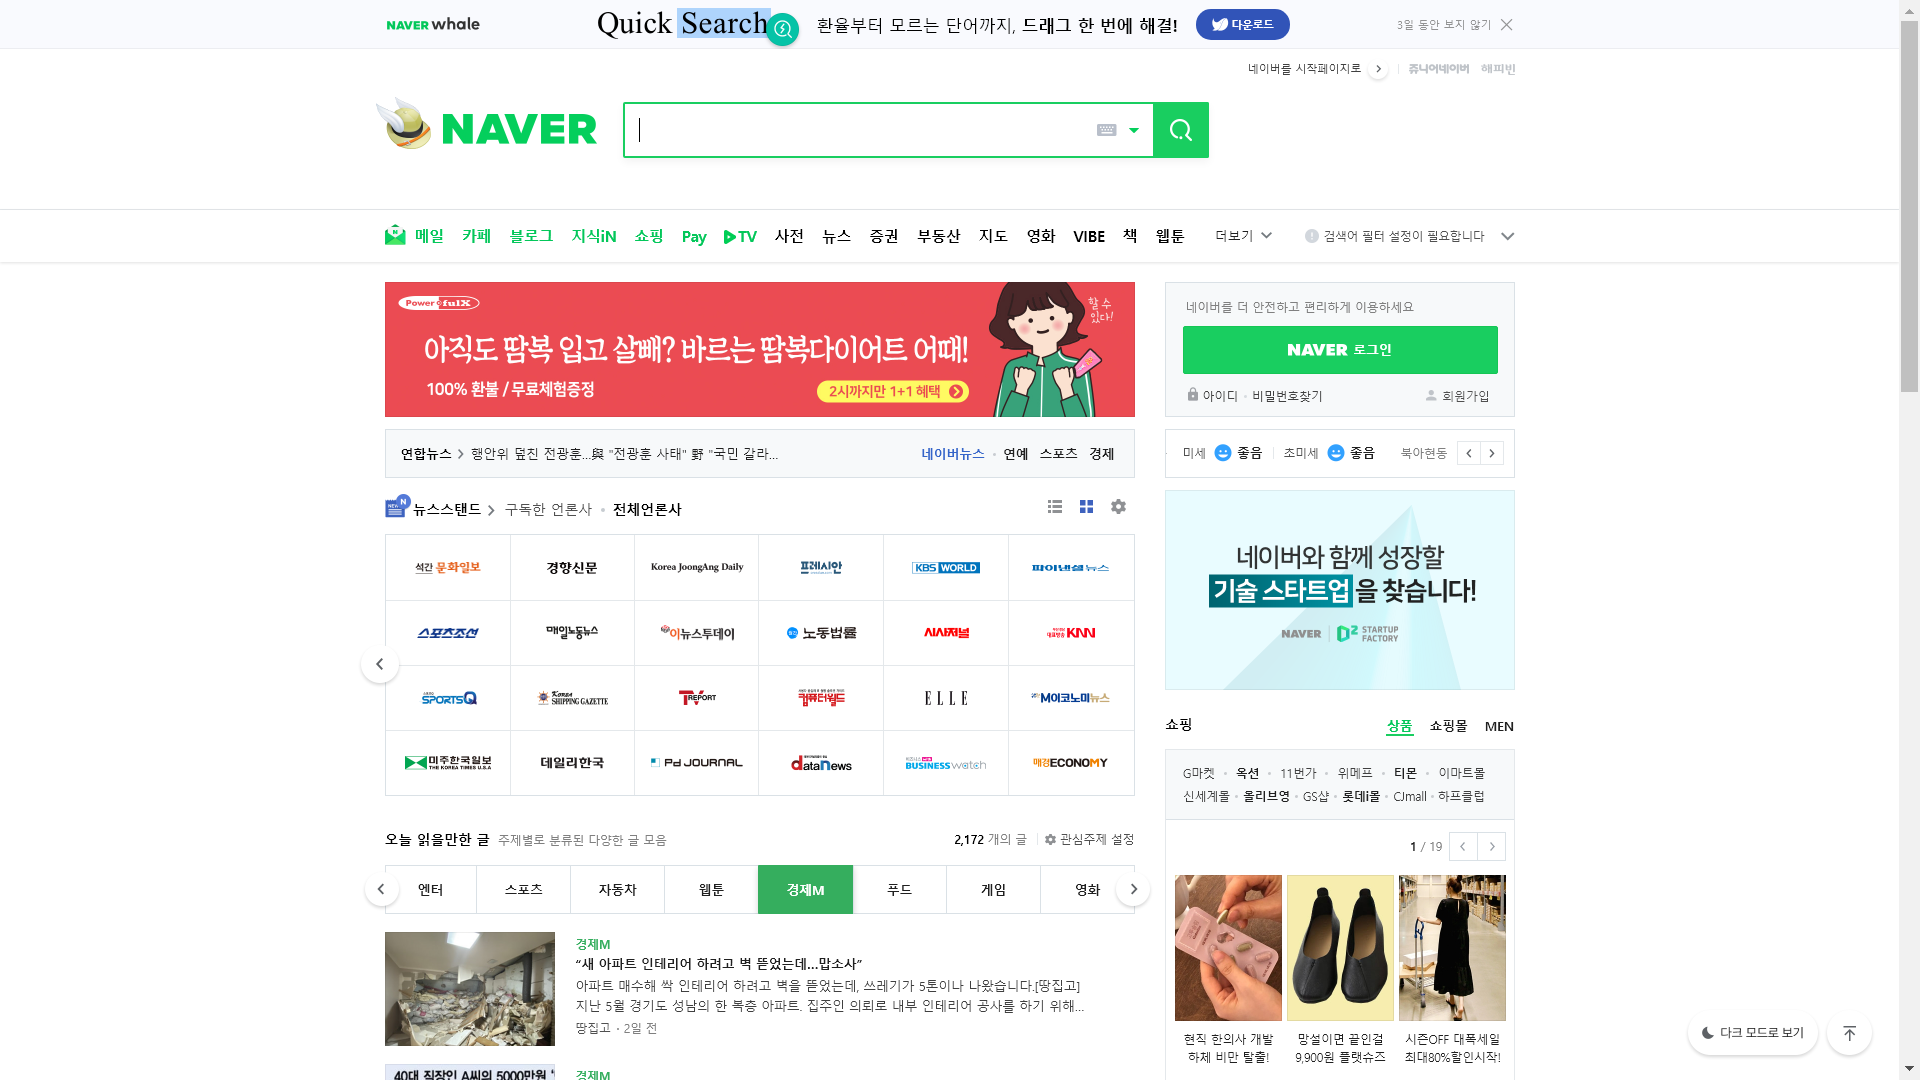

In [57]:
Image(driver.get_screenshot_as_png())

In [58]:
driver.get("https://www.coupang.com/np/search?component=&q=%ED%95%84%EB%9D%BC%EB%8D%B8%ED%94%BC%EC%95%84+%EC%B9%98%EC%A6%88+%EC%BC%80%EC%9D%B5&channel=auto")

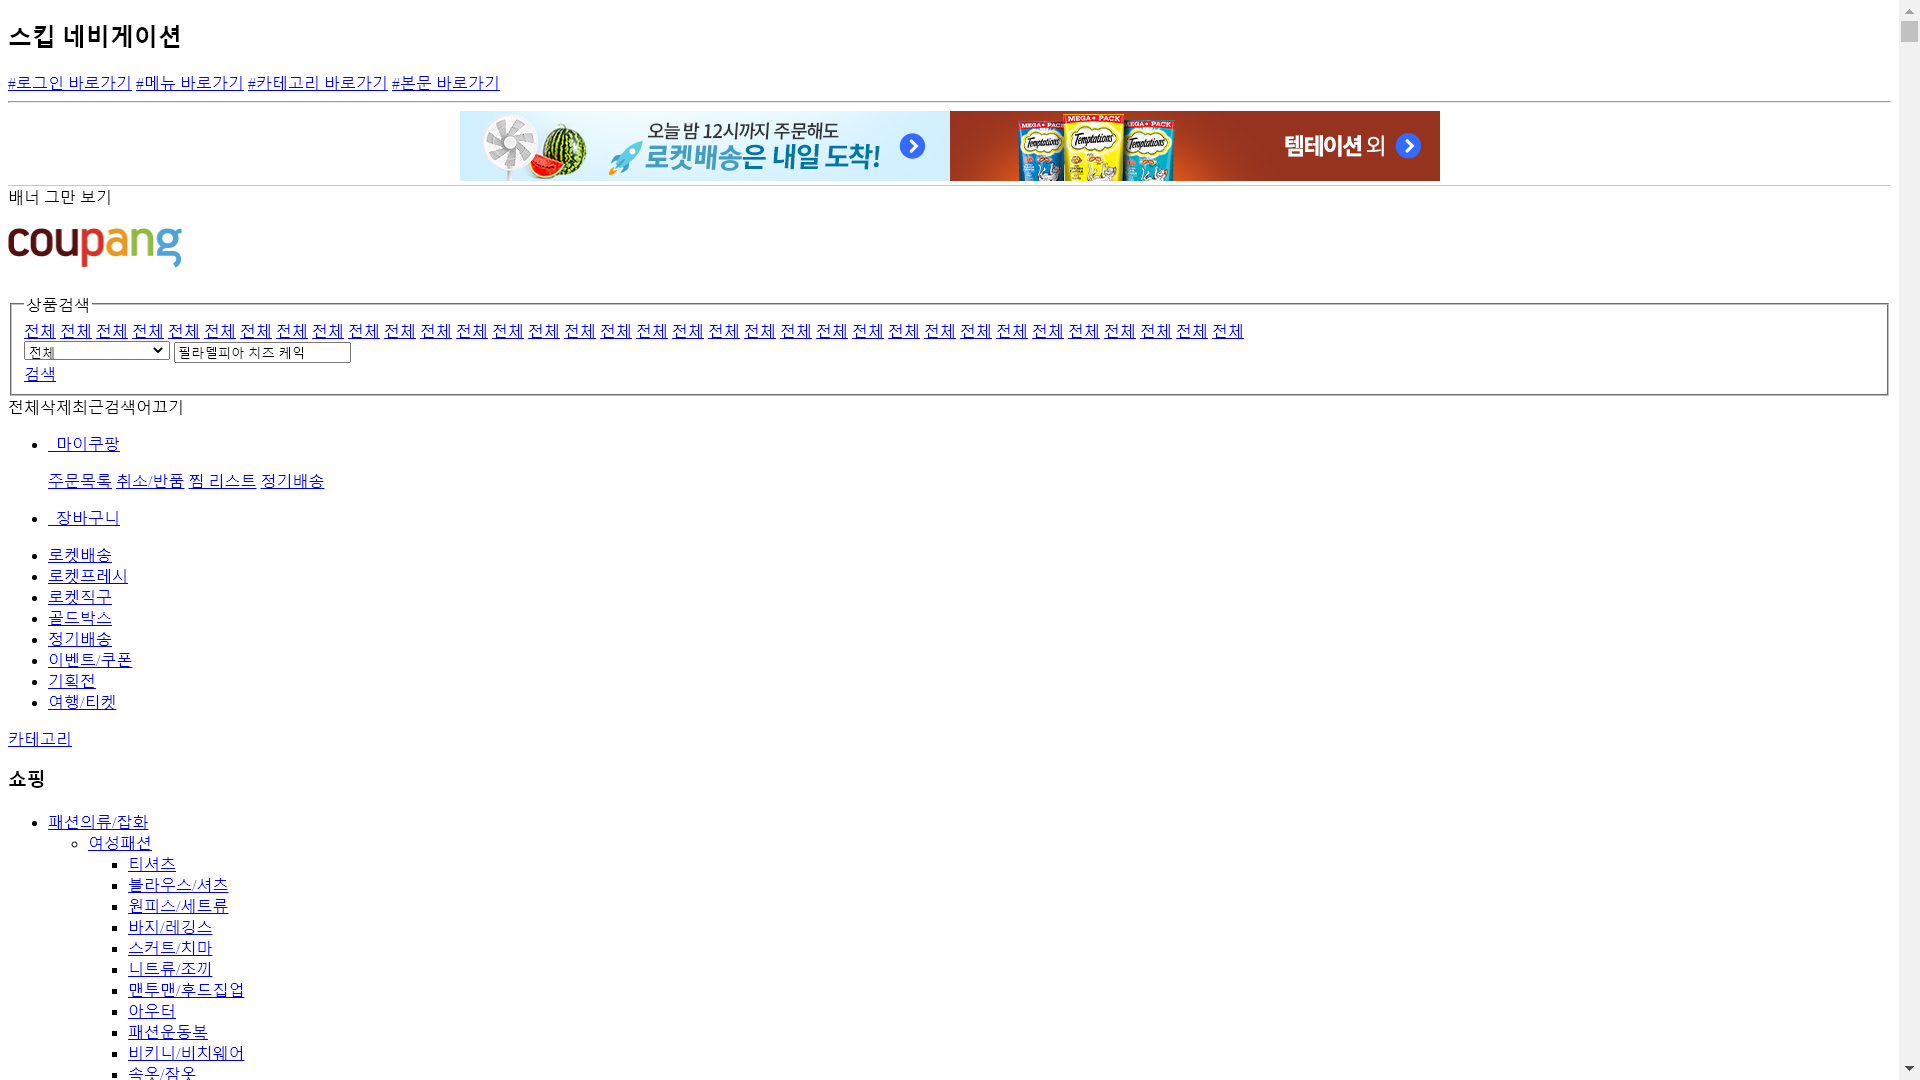

In [59]:
Image(driver.get_screenshot_as_png())

In [60]:
driver.execute_script("return navigator.userAgent") # HeadlessChromeÏù¥ Îú∏...! 

'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/84.0.4147.135 Safari/537.36'

In [61]:
driver.quit()

In [220]:
# Ìï¥Í≤∞Î≤ï (Ïø†Ìå°ÏùÄ HeadlessÎ•º ÎßâÏïÑÎ≤ÑÎ¶∞ Í≤É ...)
options.headless = False
driver = webdriver.Chrome(driver_path, options=options)

In [221]:
driver.get("https://www.coupang.com/np/search?component=&q=%ED%95%84%EB%9D%BC%EB%8D%B8%ED%94%BC%EC%95%84+%EC%B9%98%EC%A6%88+%EC%BC%80%EC%9D%B5&channel=auto")

In [65]:
driver.set_window_size(1920, 1080)

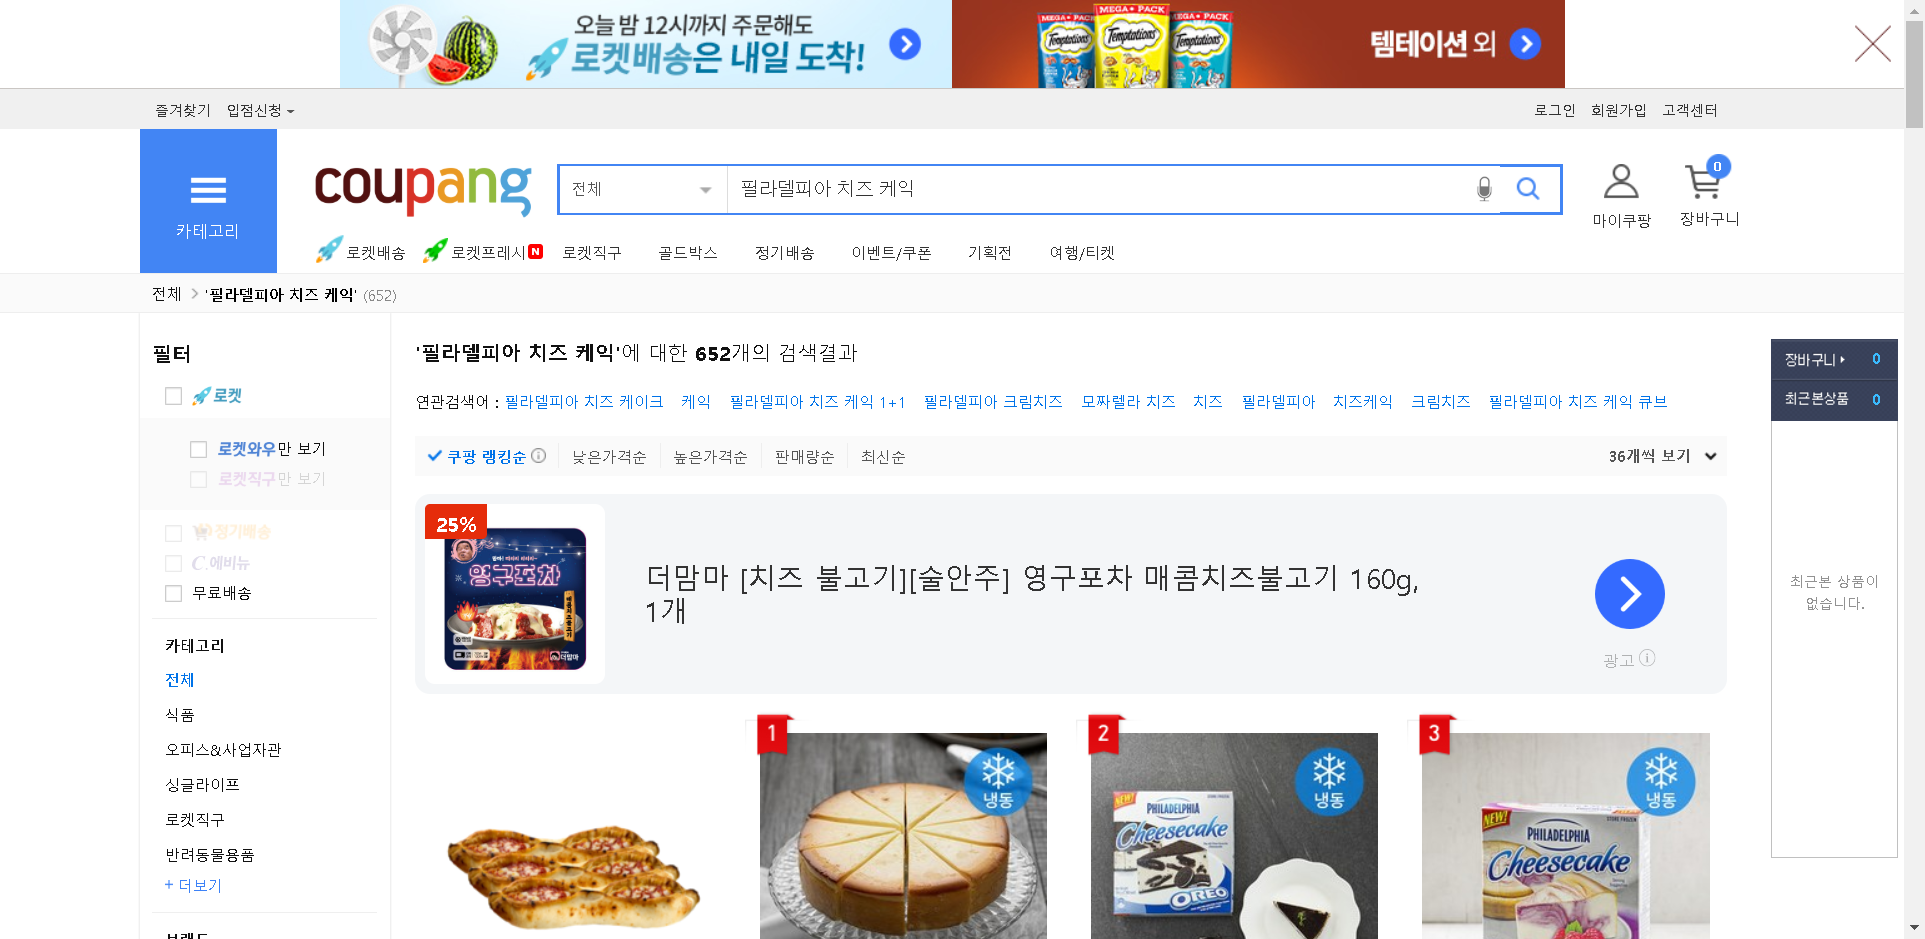

In [66]:
Image(driver.get_screenshot_as_png())

In [68]:
# search-product
driver.find_elements_by_css_selector("li.search-product")[:3]

[<selenium.webdriver.remote.webelement.WebElement (session="441f4e024a3697b5ea8214c328482714", element="1b84b9d2-ef95-49a6-8b75-b37b6c379a90")>,
 <selenium.webdriver.remote.webelement.WebElement (session="441f4e024a3697b5ea8214c328482714", element="fd9496a0-1b74-4e31-b78c-99bbbc6776b1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="441f4e024a3697b5ea8214c328482714", element="ac89ae55-e904-420e-9747-63a5bf778f4a")>]

In [70]:
# Parsing 1 
pd.DataFrame([
    liTag.text
    for liTag in driver.find_elements_by_css_selector("li.search-product")
]).head()

0
0  Í¥ëÍ≥†\nÏèòÎ†åÌã∞ÎÇò ÌîºÏûê Î™®ÏßúÎ†êÎùºÌÜ†ÎßàÌÜ† 3Í∞úÏûÖ, 180g\n17,500Ïõê\nÏàòÏöîÏùº 8/...
1  ÌïÑÎùºÎç∏ÌîºÏïÑ ÏπòÏ¶àÏºÄÏùµ ÌîåÎ†àÏù∏ (ÎÉâÎèô), 794g, 1Í∞ú\n5% 18,900\n17,9...
2  ÌïÑÎùºÎç∏ÌîºÏïÑ Ïò§Î†àÏò§ ÏπòÏ¶àÏºÄÏùµ (ÎÉâÎèô), 794g, 1Í∞ú\n5% 19,050\n18,0...
3  ÌïÑÎùºÎç∏ÌîºÏïÑ ÏπòÏ¶àÏºÄÏùµ ÎùºÏ¶àÎ≤†Î¶¨ Ïä§Ïõî (ÎÉâÎèô), 794g, 1Í∞ú\n5% 18,900\n...
4  Í¥ëÍ≥†\nÏÑúÏö∏Î∏åÎ†àÎìú Ï¥àÏΩî ÌÅ¨Î¶ºÏºÄÏù¥ÌÅ¨ (ÎÉâÎèô), 100g, 5Í∞úÏûÖ\n17,900Ïõê\n(...

In [71]:
pd.DataFrame([
    [element.find_element_by_css_selector("div.name").text, 
     element.find_element_by_css_selector("strong.price-value").text]
    
    for element in driver.find_elements_by_css_selector("li.search-product")
    
], columns = ["product", "price"])[1:6]

product   price
1         ÌïÑÎùºÎç∏ÌîºÏïÑ ÏπòÏ¶àÏºÄÏùµ ÌîåÎ†àÏù∏ (ÎÉâÎèô), 794g, 1Í∞ú  17,900
2         ÌïÑÎùºÎç∏ÌîºÏïÑ Ïò§Î†àÏò§ ÏπòÏ¶àÏºÄÏùµ (ÎÉâÎèô), 794g, 1Í∞ú  18,040
3     ÌïÑÎùºÎç∏ÌîºÏïÑ ÏπòÏ¶àÏºÄÏùµ ÎùºÏ¶àÎ≤†Î¶¨ Ïä§Ïõî (ÎÉâÎèô), 794g, 1Í∞ú  17,820
4        ÏÑúÏö∏Î∏åÎ†àÎìú Ï¥àÏΩî ÌÅ¨Î¶ºÏºÄÏù¥ÌÅ¨ (ÎÉâÎèô), 100g, 5Í∞úÏûÖ  17,900
5  ÏÑúÏö∏Î∏åÎ†àÎìú ÏºÄÏù¥ÌÅ¨ Î≤†Ïä§Ìä∏ 100g x 5Ï¢Ö ÏÑ∏Ìä∏ (ÎÉâÎèô), 1ÏÑ∏Ìä∏  17,900

In [75]:
# Ï¢Ä Îçî Ï†ïÌôïÌïòÍ≤å Ï∞æÏúºÎ†§Î©¥ re ÏÇ¨Ïö©Ìï¥ÏÑú Ï∞æÏïÑÏïºÌï†ÎìØ ...?! 
pd.DataFrame([
    [element.find_element_by_css_selector("div.name").text.split(",")[0], 
     element.find_element_by_css_selector("strong.price-value").text]
    
    for element in driver.find_elements_by_css_selector("li.search-product")
    
], columns = ["product", "price"])[1:6]

product   price
1              ÌïÑÎùºÎç∏ÌîºÏïÑ ÏπòÏ¶àÏºÄÏùµ ÌîåÎ†àÏù∏ (ÎÉâÎèô)  17,900
2              ÌïÑÎùºÎç∏ÌîºÏïÑ Ïò§Î†àÏò§ ÏπòÏ¶àÏºÄÏùµ (ÎÉâÎèô)  18,040
3          ÌïÑÎùºÎç∏ÌîºÏïÑ ÏπòÏ¶àÏºÄÏùµ ÎùºÏ¶àÎ≤†Î¶¨ Ïä§Ïõî (ÎÉâÎèô)  17,820
4              ÏÑúÏö∏Î∏åÎ†àÎìú Ï¥àÏΩî ÌÅ¨Î¶ºÏºÄÏù¥ÌÅ¨ (ÎÉâÎèô)  17,900
5  ÏÑúÏö∏Î∏åÎ†àÎìú ÏºÄÏù¥ÌÅ¨ Î≤†Ïä§Ìä∏ 100g x 5Ï¢Ö ÏÑ∏Ìä∏ (ÎÉâÎèô)  17,900

### BeautifulSoupÎ•º Ïù¥Ïö©Ìïú Îã§Î•∏ Î∞©Î≤ï 

In [222]:
# driver.page_source : txt Ï†ïÎ≥¥
soup = BeautifulSoup(driver.page_source, "html.parser")

In [84]:
soup.select("a > dl > dd > div > div.name")[1:6]

[<div class="name">ÌïÑÎùºÎç∏ÌîºÏïÑ ÏπòÏ¶àÏºÄÏùµ ÌîåÎ†àÏù∏ (ÎÉâÎèô), 794g, 1Í∞ú</div>,
 <div class="name">ÌïÑÎùºÎç∏ÌîºÏïÑ Ïò§Î†àÏò§ ÏπòÏ¶àÏºÄÏùµ (ÎÉâÎèô), 794g, 1Í∞ú</div>,
 <div class="name">ÌïÑÎùºÎç∏ÌîºÏïÑ ÏπòÏ¶àÏºÄÏùµ ÎùºÏ¶àÎ≤†Î¶¨ Ïä§Ïõî (ÎÉâÎèô), 794g, 1Í∞ú</div>,
 <div class="name">ÏÑúÏö∏Î∏åÎ†àÎìú Ï¥àÏΩî ÌÅ¨Î¶ºÏºÄÏù¥ÌÅ¨ (ÎÉâÎèô), 100g, 5Í∞úÏûÖ</div>,
 <div class="name">ÏÑúÏö∏Î∏åÎ†àÎìú ÏºÄÏù¥ÌÅ¨ Î≤†Ïä§Ìä∏ 100g x 5Ï¢Ö ÏÑ∏Ìä∏ (ÎÉâÎèô), 1ÏÑ∏Ìä∏</div>]

In [86]:
# .text Îäî listÏóê Ï†ÅÏö© Î∂àÍ∞ÄÎä•.. ÌïòÎÇòÎßå Í∞ÄÎä• ! 
soup.select("a > dl > dd > div > div.name")[1].text 

'ÌïÑÎùºÎç∏ÌîºÏïÑ ÏπòÏ¶àÏºÄÏùµ ÌîåÎ†àÏù∏ (ÎÉâÎèô), 794g, 1Í∞ú'

In [99]:
soup.select(".search-product-link")[0]

<a class="search-product-link" data-is-soldout="" data-item-id="2540042096" data-product-id="1478504081" data-srp-log='{"group":"PRODUCT", "itemId":"2540042096", "productId":"1478504081", "vendorItemId":"70532707841", "page":"1", "listSize":"36", "isCcidEligible":false, "displayCcidBadge":false, "wowOnlyInstantDiscountRate": -1, "snsDiscountRate" : -1 }' data-vendor-item-id="70532707841" href="/vp/products/1478504081?itemId=2540042096&amp;vendorItemId=70532707841&amp;sourceType=srp_product_ads&amp;q=%ED%95%84%EB%9D%BC%EB%8D%B8%ED%94%BC%EC%95%84+%EC%B9%98%EC%A6%88+%EC%BC%80%EC%9D%B5&amp;itemsCount=40&amp;searchId=9442a48540924e9bbadd80ceacac724a&amp;rank=0" style="height: 482px;" target="_blank"><dl class="search-product-wrap" style="height: 482px;"><dt class="image"> <img alt="ÏèòÎ†åÌã∞ÎÇò ÌîºÏûê Î™®ÏßúÎ†êÎùºÌÜ†ÎßàÌÜ† 3Í∞úÏûÖ, 180g" class="search-product-wrap-img" data-load-time="1621.1699999985285" data-load-time-end="1616.05499999132" data-load-time-start="649.5549999526702" data-src

In [223]:
# Ïôú list ÌòïÏãùÏúºÎ°ú Í∞íÏù¥ ÎÇòÏò¨Íπå ? -> .text 
pd.DataFrame([
    [element.select_one("div.name").text, element.select_one("div.price strong").text] 
    for element in soup.select(".search-product-link")
    
], columns = ["product", "price"])[1:6]

product   price
1              ÌïÑÎùºÎç∏ÌîºÏïÑ Ïò§Î†àÏò§ ÏπòÏ¶àÏºÄÏùµ (ÎÉâÎèô), 794g, 1Í∞ú  18,040
2          ÌïÑÎùºÎç∏ÌîºÏïÑ ÏπòÏ¶àÏºÄÏùµ ÎùºÏ¶àÎ≤†Î¶¨ Ïä§Ïõî (ÎÉâÎèô), 794g, 1Í∞ú  17,820
3                    ÌïÑÎùºÎç∏ÌîºÏïÑ ÏπòÏ¶à ÏºÄÏù¥ÌÅ¨, 1.7kg, 1Í∞ú  29,890
4       ÏÑúÏö∏Î∏åÎ†àÎìú ÏºÄÏù¥ÌÅ¨ Î≤†Ïä§Ìä∏ 100g x 5Ï¢Ö ÏÑ∏Ìä∏ (ÎÉâÎèô), 1ÏÑ∏Ìä∏  17,900
5  CJ Í≥†Î©î Î∞îÏÇ≠ÌäÄÍ≤®ÎÇ∏Î™®ÏßúÎ†êÎùºÎèàÏπ¥Ï∏† 450g X 3Í∞ú, ÏóÜÏùå, ÏÉÅÏÑ∏ÏÑ§Î™Ö Ï∞∏Ï°∞  19,900

In [100]:
driver.close()

## Ïù∏Ïä§ÌÉÄÍ∑∏Îû® ÌÅ¨Î°§ÎßÅ 

In [127]:
driver = webdriver.Chrome(driver_path)
driver.get("https://www.instagram.com/explore/tags/%ED%8F%AC%EB%A9%94%EB%9D%BC%EB%8B%88%EC%95%88/")

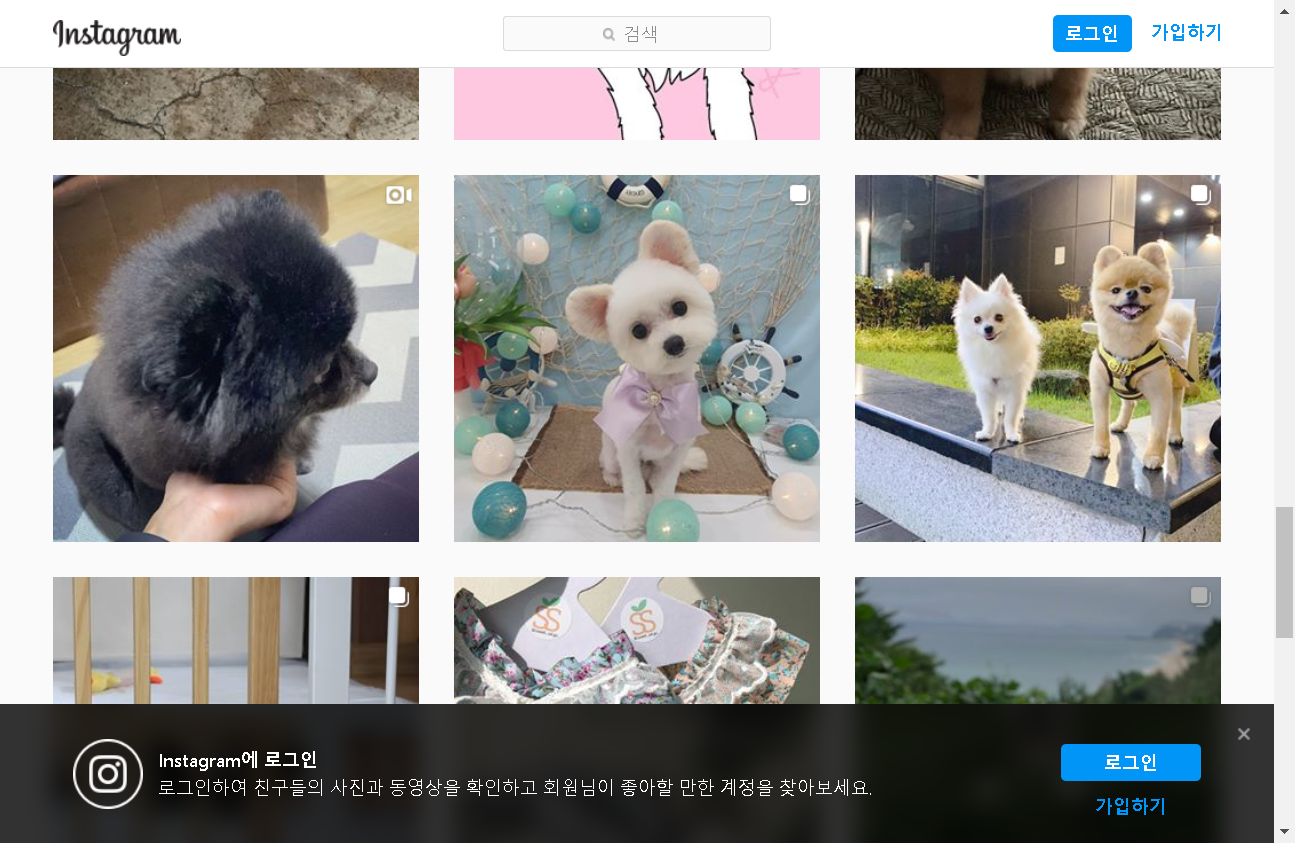

In [102]:
Image(driver.get_screenshot_as_png(), width=500)

In [108]:
# Î¨¥Ìïú scrolling 
MAX_HEIGHT = 3000000
driver.execute_script(f"window.scrollTo(0,{MAX_HEIGHT})")

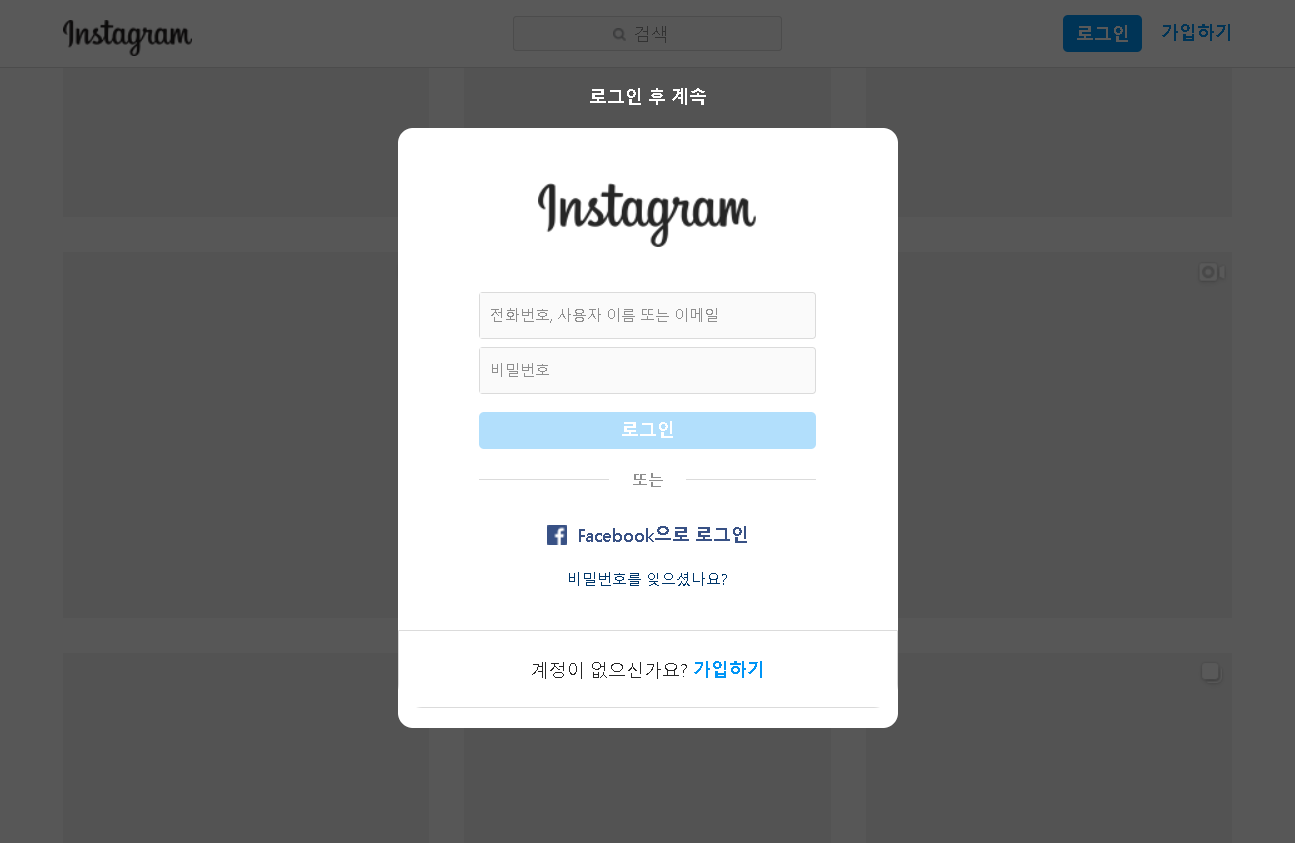

In [109]:
# ÎÇ¥Î†§Í∞ÄÎã§Í∞Ä Î©àÏ∂§ 
Image(driver.get_screenshot_as_png(), width=500)

In [110]:
soup = BeautifulSoup(driver.page_source,"html.parser")
elements = soup.select("div.v1Nh3.kIKUG._bz0w")

In [111]:
len(elements) # 66Í∞ú ÎÇòÏò§Í≥† ÎÅù..! 

66

In [130]:
MAX_HEIGHT = 100000000
driver.execute_script(f"window.scrollTo(0,{MAX_HEIGHT})")

In [131]:
# SendKey 
driver.find_element_by_css_selector('input[name="username"]').send_keys("?")
driver.find_element_by_css_selector('input[name="password"]').send_keys("?")
driver.find_element_by_css_selector('button[type="submit"]').click()

In [133]:
# Î°úÍ∑∏Ïù∏ Ï†ïÎ≥¥Ï†ÄÏû• ÎÇòÏ§ëÏóê ÌïòÍ∏∞ ... 
driver.find_element_by_css_selector('button[class="sqdOP yWX7d    y3zKF     "]').click()

In [144]:
MAX_HEIGHT = 500000000 # ÏúÑÏóê ÏûàÎäîÍ≤å ÏóÜÏñ¥Ï†∏ÏÑú...... -> Ï™ºÎÅî ÎÇ¥Î¶¨Í≥† ÌÅ¨Î°§ÎßÅÌïòÍ≥† + Ï™ºÎÅî ÎÇ¥Î¶¨Í≥† ÌÅ¨Î°§ÎßÅÌïòÍ≥† 
driver.execute_script(f"window.scrollTo(0,{MAX_HEIGHT})")

In [145]:
soup = BeautifulSoup(driver.page_source,"html.parser")
elements = soup.select("div.v1Nh3.kIKUG._bz0w")

In [146]:
len(elements)

57

In [147]:
driver.close()

## ÎèôÏ†Å ÏõπÏÇ¨Ïù¥Ìä∏ XHR ÌÅ¨Î°§ÎßÅ
* Selenium Ïì∞ÏßÄ ÏïäÍ≥†ÎèÑ ÌÅ¨Î°§ÎßÅ Í∞ÄÎä• ! 
* Ï†ïÎ≥¥ÎèÑ ÎßéÍ≥†, ÍπîÎÅîÌïòÍ≤å Í∞ÄÏ†∏Ïò¨ Ïàò ÏûàÏùå 

In [148]:
def instagram_tag(tag) : 
    
    url = f"https://www.instagram.com/explore/tags/{tag}/?__a=1"

    payload = {}
    headers = {
      'Cookie': 'ig_did=0ABA19E8-E04A-4C72-BC3E-31C986FB85C0; csrftoken=UBCPMhZnrWsV0W0UoMc8rLzhuky55RL5; rur=FRC; mid=X0Ci2gAEAAGIHYopnc9CxEMMvuCo; urlgen="{\\"122.46.232.47\\": 17858}:1k9LP1:h7XI11OsndUEtz_gkV7qLjrZzio"'
    }

    response = requests.request("GET", url, headers=headers)
    
    return response

In [149]:
res = instagram_tag("Ìè¨Î©îÎùºÎãàÏïà")

In [150]:
res

<Response [200]>

In [153]:
res.json() # Ï†ïÎ≥¥Í∞Ä ÎÑàÎ¨¥ ÎßéÎã§ 

{'graphql': {'hashtag': {'id': '17841528820113886',
   'name': 'Ìè¨Î©îÎùºÎãàÏïà',
   'allow_following': False,
   'is_following': False,
   'is_top_media_only': False,
   'profile_pic_url': 'https://scontent-ssn1-1.cdninstagram.com/v/t51.2885-15/e35/c0.180.1440.1440a/s150x150/117659218_154183706285926_8761701932637300428_n.jpg?_nc_ht=scontent-ssn1-1.cdninstagram.com&_nc_cat=110&_nc_ohc=WATq0CO5KvcAX_30Q1-&oh=be3171a03b2d81e59679342ddbff944f&oe=5F6AAE70',
   'edge_hashtag_to_media': {'count': 4433272,
    'page_info': {'has_next_page': True,
     'end_cursor': 'QVFEOGtRUDNPRUY0OFRIN0dRRUtHRmFPWFJUVm9DQWxyNG5URnpxNkRQclpwUmNrZU5rMFQ5X09BRmgzZi01RmtXUFRuek1vSnVaX2NVeHluMklWNWtxUw=='},
    'edges': [{'node': {'comments_disabled': False,
       '__typename': 'GraphSidecar',
       'id': '2381120578604936923',
       'edge_media_to_caption': {'edges': [{'node': {'text': 'Í∞∏Ïö∞Îö±#Ìè¨Î©î#Í∞ïÏïÑÏßÄ#Ïï†Í≤¨#Ìè¨Î©îÎùºÎãàÏïà #Í∞ïÏïÑÏßÄÍ∑∏Îû® #Í∞ïÏïÑÏßÄÏùºÏÉÅ#ÏùºÏÉÅ#Îç∞ÏùºÎ¶¨#Î∞òÎ†§Í≤¨'}}]},
     

In [154]:
def get_json_by_path(path, js) : 
    path_arr = path.split(".")
    while path_arr : 
        key = path_arr.pop(0)
        js = js.get(key, {})
    return js

In [155]:
# copy property path : Í≤ΩÎ°ú Ï£ºÏñ¥Ïßê 
result_json = res.json() 
edges = get_json_by_path('graphql.hashtag.edge_hashtag_to_media.edges', result_json)

In [156]:
json_normalize(edges)

node.comments_disabled node.__typename              node.id  \
0                    False    GraphSidecar  2381120578604936923   
1                    False    GraphSidecar  2381120574343025269   
2                    False      GraphVideo  2381119574386782723   
3                    False    GraphSidecar  2381120355148055018   
4                    False      GraphImage  2381120268763382256   
..                     ...             ...                  ...   
67                   False      GraphImage  2380640332237819280   
68                   False    GraphSidecar  2380609372989556885   
69                   False      GraphImage  2380597142466259189   
70                   False    GraphSidecar  2380377207535038215   
71                   False      GraphImage  2380370837560839342   

                     node.edge_media_to_caption.edges node.shortcode  \
0   [{'node': {'text': 'Í∞∏Ïö∞Îö±#Ìè¨Î©î#Í∞ïÏïÑÏßÄ#Ïï†Í≤¨#Ìè¨Î©îÎùºÎãàÏïà #Í∞ïÏïÑÏßÄÍ∑∏Îû®...    CELcIzvHq7b   
1   [{'node': {'text': '.
MYSTERYGOLF R LINE WOOD ...    CELcIvxFxJ1   
2   [{'node': {'text': 'ÎÇ†ÏåòÎèåÏù¥ #Í∑ÄÏó¨Ïõå‚ù§Ô∏èüê∂
.
.
.
.
.
.
....    CELb6MfDbID   
3   [{'node': {'text': '„Éª
„Éª
„Éª
ÊâãË°ìÂâç‰ª•Êù•„ÅÆ„Ç∑„É£„É≥„Éó„Éº
„Ç∑„É£„É≥„Éó„ÉºÂæå„Å´Ê∞ó...    CELcFjoDUHq   
4   [{'node': {'text': 'ÏïàÎÖïÌïòÍ∞ú‚ô°
ÍµøÎ™®Îãù
.
.
.
.
.
#ÌÉÑ #ÌÉÑÏù¥...    CELcETLH8Hw   
..                                                ...            ...   
67                    [{'node': {'text': '·ÑÜ·Ö¶·ÑÖ·Ö©·Üº~ü§™'}}]    CEJu8TdAM2Q   
68  [{'node': {'text': '·Ñç·Ö¢·ÑÖ·Öß·Ñá·Ö©·Ñå·Öµ ·ÑÜ·Ö°·ÜØ·ÑÖ·Ö°·ÑÄ·Ö© ·ÑÇ·ÖÆ·ÑÄ·ÖÆ·ÜØ·ÑÉ·Ö°·Ü±·Ñã...    CEJn5yaAgiV   
69  [{'node': {'text': '·Ñã·ÖÆ·Ñå·ÖÆ·Ñâ·Ö•·Ü´·Ñã·Ö¶·Ñâ·Ö• ·Ñç·Öµ·Ü®·Ñã·Ö≥·Ü´ ·ÑÉ·Ö•·ÜØ·Ñè·Ö•·Üº·ÑÉ...    CEJlHz2Auj1   
70        [{'node': {'text': 'ÎÇò Í∏∞ÏóΩÏßï ‡∑Ü‚Éõ( ‡ØçÃÅÍá¥ ‡ØçÃÄ)‡∑Ü‚Éõ'}}]    CEIzHVej-8H   
71               [{'node': {'text': 'Îπ®Î¶¨ ÎßåÏ†∏Îùº Ï£ºÏù∏Ïû• üê∂'}}]    CEIxqo-g0yu   

    node.edge_media_to_comment.count  node.taken_at_timestamp  \
0                                  0               1598071714   
1                                  0               1598071713   
2                                  0               1598071709   
3                                  0               1598071687   
4                                  0               1598071677   
..                               ...                      ...   
67                                 4               1598014464   
68                                10               1598010773   
69                                13               1598009315   
70                                 6               1597983097   
71                                 2               1597982338   

    node.dimensions.height  node.dimensions.width  \
0                      750                    750   
1                     1080                   1080   
2                      750                    750   
3                     1080                   1080   
4                     1080                   1080   
..                     ...                    ...   
67                    1080                   1080   
68                    1080                   1080   
69                    1080                   1080   
70                     750                    750   
71                    1080                   1080   

                                     node.display_url  \
0   https://scontent-ssn1-1.cdninstagram.com/v/t51...   
1   https://scontent-ssn1-1.cdninstagram.com/v/t51...   
2   https://scontent-ssn1-1.cdninstagram.com/v/t51...   
3   https://scontent-ssn1-1.cdninstagram.com/v/t51...   
4   https://scontent-ssn1-1.cdninstagram.com/v/t51...   
..                                                ...   
67  https://scontent-ssn1-1.cdninstagram.com/v/t51...   
68  https://scontent-ssn1-1.cdninstagram.com/v/t51...   
69  https://scontent-ssn1-1.cdninstagram.com/v/t51...   
70  https://scontent-ssn1-1.cdninstagram.com/v/t51...   
71  https:

## iframe 
* ÎÑ§Ïù¥Î≤Ñ ÌôòÏú® Ï†ïÎ≥¥ ÌÅ¨Î°§ÎßÅ 
* ÌéòÏù¥ÏßÄÍ∞Ä Î∂ÑÎ¶¨ ÎêòÏñ¥ ÏûàÎäî Í≤ΩÏö∞ 

In [202]:
driver = webdriver.Chrome(driver_path)
driver.get("https://finance.naver.com/marketindex/exchangeDetail.nhn?marketindexCd=FX_USDKRW")

In [203]:
driver.switch_to.frame(driver.find_element_by_css_selector("iframe[title='ÏùºÎ≥ÑÏãúÏÑ∏']"))

In [204]:
soup = BeautifulSoup(driver.page_source, "html.parser")

In [205]:
soup.select("table.tbl_exchange.today")

[<table border="1" class="tbl_exchange today" summary="ÏùºÎ≥Ñ ÌôòÏú® Î¶¨Ïä§Ìä∏">
 <caption>ÏùºÎ≥Ñ ÌôòÏú®</caption>
 <colgroup>
 <col width="78"/>
 <col width="78"/>
 <col width="73"/>
 <col width="76"/>
 <col width="76"/>
 <col width="76"/>
 <col width="78"/>
 <col width="85"/>
 </colgroup>
 <thead>
 <tr>
 <th class="th_today1" rowspan="2"><span>ÎÇ†Ïßú</span></th>
 <th class="th_today2" rowspan="2"><span>Îß§Îß§Í∏∞Ï§ÄÏú®</span></th>
 <th class="th_today3" rowspan="2"><span>Ï†ÑÏùºÎåÄÎπÑ</span></th>
 <th class="th_today4" colspan="2"><span>ÌòÑÏ∞∞</span></th>
 <th class="th_today5" colspan="2"><span>ÏÜ°Í∏à</span></th>
 <th class="th_today6" rowspan="2"><span>T/C ÏÇ¨Ïã§Îïå</span></th>
 <th class="th_today7" rowspan="2"><span>Ïô∏ÌôîÏàòÌëú ÌååÏã§ Îïå</span></th>
 </tr>
 <tr>
 <th class="th_today9"><span>ÏÇ¨Ïã§ Îïå </span></th>
 <th class="th_today10"><span>ÌååÏã§ Îïå </span></th>
 <th class="th_today11"><span>Î≥¥ÎÇ¥Ïã§ Îïå </span></th>
 <th class="th_today12"><span>Î∞õÏúºÏã§ Îïå</span></th>
 

In [217]:
df = pd.DataFrame([
    [element.select_one("td.date").text , element.select_one("td.num").text]
    for element in soup.select("table.tbl_exchange.today tr")[3:10] 
    
], columns = ["Í≥†ÏãúÌöåÏ∞®", "Îß§Îß§Í∏∞Ï§ÄÏú®"])

In [218]:
df

Í≥†ÏãúÌöåÏ∞®     Îß§Îß§Í∏∞Ï§ÄÏú®
0  2020.08.20  1,188.50
1  2020.08.19  1,178.00
2  2020.08.18  1,184.50
3  2020.08.14  1,187.50
4  2020.08.13  1,184.50
5  2020.08.12  1,184.50
6  2020.08.11  1,184.50

In [224]:
driver.close()

### pd.read_html
* list ÏïàÏóê dataframeÏù¥ ÏûàÎäî ÌòïÌÉú 

In [200]:
# Îçî Í∞ÑÎã®Ìïú Î∞©Î≤ï 
pd.read_html("https://finance.naver.com/marketindex/exchangeDailyQuote.nhn?marketindexCd=FX_USDKRW")[0]

ÎÇ†Ïßú   Îß§Îß§Í∏∞Ï§ÄÏú®  Ï†ÑÏùºÎåÄÎπÑ       ÌòÑÏ∞∞               ÏÜ°Í∏à          T/C ÏÇ¨Ïã§Îïå  \
           ÎÇ†Ïßú   Îß§Îß§Í∏∞Ï§ÄÏú®  Ï†ÑÏùºÎåÄÎπÑ     ÏÇ¨Ïã§ Îïå     ÌååÏã§ Îïå   Î≥¥ÎÇ¥Ïã§ Îïå   Î∞õÏúºÏã§ Îïå  T/C ÏÇ¨Ïã§Îïå   
0  2020.08.21  1189.5   1.0  1210.31  1168.69  1201.1  1177.9  1203.77   
1  2020.08.20  1188.5  10.5  1209.29  1167.71  1200.1  1176.9  1202.76   
2  2020.08.19  1178.0   6.5  1198.61  1157.39  1189.5  1166.5  1192.13   
3  2020.08.18  1184.5   3.0  1205.22  1163.78  1196.1  1172.9  1198.71   
4  2020.08.14  1187.5   3.0  1208.28  1166.72  1199.1  1175.9  1201.75   
5  2020.08.13  1184.5   0.0  1205.22  1163.78  1196.1  1172.9  1198.71   
6  2020.08.12  1184.5   0.0  1205.22  1163.78  1196.1  1172.9  1198.71   
7  2020.08.11  1184.5   3.0  1205.22  1163.78  1196.1  1172.9  1198.71   
8  2020.08.10  1187.5   1.0  1208.28  1166.72  1199.1  1175.9  1201.75   
9  2020.08.07  1188.5   3.0  1209.29  1167.71  1200.1  1176.9  1202.76   

  Ïô∏ÌôîÏàòÌëú ÌååÏã§ Îïå  
  Ïô∏ÌôîÏàòÌëú ÌååÏã§ Îïå  
0   1177.23  
1   1176.24  
2   1165.85  
3   1172.24  
4   1175.24  
5   1172.24  
6   1172.24  
7   1172.24  
8   1175.24  
9   1176.24

In [196]:
def get_ex_usd_by_page(n) : 
    try:
        return pd.read_html(f"https://finance.naver.com/marketindex/exchangeDailyQuote.nhn?marketindexCd=FX_USDKRW&page={n}")
    except: 
        print("error")

In [199]:
get_ex_usd_by_page(3)[0]

ÎÇ†Ïßú   Îß§Îß§Í∏∞Ï§ÄÏú® Ï†ÑÏùºÎåÄÎπÑ       ÌòÑÏ∞∞               ÏÜ°Í∏à          T/C ÏÇ¨Ïã§Îïå  \
           ÎÇ†Ïßú   Îß§Îß§Í∏∞Ï§ÄÏú® Ï†ÑÏùºÎåÄÎπÑ     ÏÇ¨Ïã§ Îïå     ÌååÏã§ Îïå   Î≥¥ÎÇ¥Ïã§ Îïå   Î∞õÏúºÏã§ Îïå  T/C ÏÇ¨Ïã§Îïå   
0  2020.07.23  1198.5  1.5  1219.47  1177.53  1210.2  1186.8  1212.88   
1  2020.07.22  1197.0  1.0  1217.94  1176.06  1208.7  1185.3  1211.36   
2  2020.07.21  1196.0  7.0  1216.93  1175.07  1207.7  1184.3  1210.35   
3  2020.07.20  1203.0  2.0  1224.05  1181.95  1214.7  1191.3  1217.43   
4  2020.07.17  1205.0  0.0  1226.08  1183.92  1216.8  1193.2  1219.46   
5  2020.07.16  1205.0  4.0  1226.08  1183.92  1216.8  1193.2  1219.46   
6  2020.07.15  1201.0  5.5  1222.01  1179.99  1212.7  1189.3  1215.41   
7  2020.07.14  1206.5  3.5  1227.61  1185.39  1218.3  1194.7  1220.97   
8  2020.07.13  1203.0  2.0  1224.05  1181.95  1214.7  1191.3  1217.43   
9  2020.07.10  1201.0  6.0  1222.01  1179.99  1212.7  1189.3  1215.41   

  Ïô∏ÌôîÏàòÌëú ÌååÏã§ Îïå  
  Ïô∏ÌôîÏàòÌëú ÌååÏã§ Îïå  
0   1186.13  
1   1184.63  
2   1183.63  
3   1190.63  
4   1192.52  
5   1192.53  
6   1188.63  
7   1194.03  
8   1190.63  
9   1188.63